# <PART 1: Individual steps>

In [1]:
import torch
# import torchvision
from torchvision.datasets import MNIST
import numpy as np

## Step1: Call the training and test dataset

In [2]:
dataset = MNIST(root='data/', download=False, train=True)
print(dataset)
print(len(dataset))
test_dataset = MNIST(root='data/', train=False)
print(test_dataset)
print(len(test_dataset))

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
60000
Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test
10000


## Step2: Call each image file as a picture or a tensor object

### picture

5

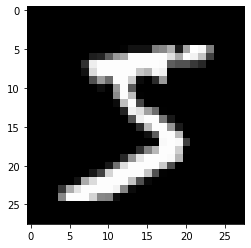

In [3]:
import matplotlib.pyplot as plt
image, label = dataset[0]
plt.imshow(image, cmap='gray')
label

### tensor

In [4]:
import torchvision.transforms as transforms
dataset = MNIST(root = 'data/', train=True, transform = transforms.ToTensor())
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
print(img_tensor.dtype)

torch.Size([1, 28, 28]) 5
torch.float32


## Step3: Split the training dataset

* random_split() splits the 60000 samples in the training dataset into training (500000) and validation (100000) dataset.

In [5]:
# a,b=random_split(torch.tensor([1,2,3]), [2,1])
# a[0],a[1], b[0]

In [6]:
from torch.utils.data import random_split
torch.manual_seed(0)
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

* DataLoader() splits the 50000 images in the training dataset into 391 batches, each with 128 objects (and one batch with the remaining). 
* train_loader and val_loader generates an object that contains 391 and 79 batches of data. Each batch has len=2, with the elements being a 128-1-28-28 tensor object and a 128 labels. However the last batch may have a size fewer than 128.
* Each batch contains two types of data: 128 image files and 128 labels, named as xb and yb.

In [7]:
from torch.utils.data import DataLoader
batch_size=128
train_loader=DataLoader(train_ds, batch_size, shuffle=True)
val_loader=DataLoader(val_ds, batch_size)
print(len(train_loader)) # 391 batches in total.
print(len(val_loader)) # 79 batches in total.

391
79


In [8]:
length_vec = []
for xb, yb in train_loader:
    length_vec.append(len(xb))
print(np.array(length_vec)[[0,len(train_loader)-1]]) # all batches with 128 image files, last batch 80 image files

length_vec = []
for xb, yb in val_loader:
    length_vec.append(len(xb))
print(np.array(length_vec)[[0,len(val_loader)-1]]) # all batches with 128 image files, last batch 16 image files

[128  80]
[128  16]


* This is how we pick out an individual element.

In [9]:
for element in train_loader:
    break
len(element), element[0].shape, len(element[0]), element[1]

(2,
 torch.Size([128, 1, 28, 28]),
 128,
 tensor([0, 5, 9, 7, 2, 6, 1, 6, 9, 5, 9, 9, 6, 7, 4, 5, 2, 4, 3, 3, 0, 7, 7, 7,
         7, 8, 5, 4, 7, 5, 5, 2, 0, 4, 2, 1, 2, 2, 0, 6, 2, 9, 6, 5, 2, 3, 7, 5,
         0, 3, 2, 3, 1, 4, 9, 5, 7, 3, 2, 5, 8, 3, 7, 7, 2, 3, 0, 2, 7, 1, 9, 4,
         2, 6, 3, 1, 3, 6, 2, 0, 3, 8, 8, 8, 3, 4, 4, 2, 1, 5, 5, 7, 6, 7, 6, 0,
         9, 3, 6, 1, 0, 1, 2, 1, 0, 9, 2, 3, 5, 4, 2, 2, 3, 3, 9, 3, 5, 4, 0, 9,
         1, 8, 7, 8, 2, 5, 7, 7]))

* This is how we pick one element from train_loader.
* Every time we realize train_loader, we shuffle it, so we get to observe a randomly selected batch.

In [10]:
for dataset in train_loader: # Each dataset contains two types of data
    print(dataset[0].shape) # 4-dim tensor: 128 tensor objects of 1-28-28.
    print(dataset[1]) # 128 labels.
    break

torch.Size([128, 1, 28, 28])
tensor([7, 7, 8, 0, 7, 2, 6, 0, 8, 6, 2, 7, 3, 8, 0, 2, 5, 8, 2, 1, 4, 1, 1, 7,
        6, 1, 9, 2, 6, 2, 5, 1, 9, 4, 4, 5, 9, 7, 4, 6, 6, 7, 1, 3, 2, 1, 0, 6,
        6, 9, 5, 0, 3, 9, 8, 1, 0, 2, 5, 1, 1, 7, 6, 4, 1, 0, 6, 1, 0, 5, 0, 9,
        9, 4, 6, 5, 8, 1, 1, 3, 3, 3, 2, 3, 8, 7, 0, 9, 5, 2, 8, 0, 6, 1, 6, 1,
        7, 4, 3, 0, 9, 7, 3, 6, 0, 1, 8, 1, 3, 6, 9, 2, 7, 8, 6, 3, 6, 5, 6, 7,
        3, 9, 8, 2, 4, 0, 9, 3])


## Step4: Generate a model and predict with it. (Single Step)

* We have 10 output variables, which eventually become the proability of each class.
* For each output variable, we do a (generalized) linear regression: 784 inputs (weights) and 1 constant (bias).
* nn.Linear(input variable #, output variable #)
* We just randomly generated a model, so its accuracy is terrible at the first time.

In [11]:
import torch.nn as nn
input_size = 28 * 28
num_classes = 10
model = nn.Linear(input_size, num_classes) # randomly generate a linear model with 
print(model.weight.shape) # 784 weights allocated to each pixel for each class = 784 input variables
print(model.bias) # 1 bias allocated to each class = 1 constant term

torch.Size([10, 784])
Parameter containing:
tensor([ 0.0356,  0.0136, -0.0266,  0.0188,  0.0147, -0.0263,  0.0197,  0.0134,
         0.0211, -0.0227], requires_grad=True)


* Recall that model inputs and outputs $N\times p$ and $N\times K$ matrices.
* So we need to transform the input tensor of size=128-1-28-28 into ?-784 (=128-784) matrix, in order to use it as the input variable.
* When transforming it, we get to line them all up in order. Since the 128 tensors is the very outer bracket, each 1-28-28 tensor is lined up as a single line.

In [12]:
for images, labels in train_loader: # just one batch : break
    print(labels)
    print(images.shape)
    outputs = model(images.reshape(-1,784))
    print(outputs)
    print(outputs.shape)
    break

tensor([9, 3, 4, 0, 6, 3, 8, 1, 3, 0, 2, 3, 0, 0, 2, 1, 3, 5, 5, 0, 2, 1, 8, 9,
        4, 6, 1, 1, 0, 2, 6, 3, 7, 3, 7, 1, 9, 8, 2, 7, 6, 3, 1, 7, 2, 8, 2, 7,
        0, 5, 7, 7, 0, 3, 8, 5, 0, 0, 3, 7, 9, 0, 3, 3, 8, 4, 7, 8, 0, 7, 0, 1,
        2, 6, 0, 2, 6, 3, 4, 3, 7, 2, 8, 2, 0, 7, 1, 7, 6, 0, 5, 7, 0, 1, 7, 3,
        1, 6, 5, 1, 4, 3, 7, 4, 5, 3, 6, 3, 1, 3, 3, 8, 1, 2, 0, 9, 6, 4, 8, 0,
        7, 6, 1, 2, 1, 8, 3, 9])
torch.Size([128, 1, 28, 28])
tensor([[-0.0963, -0.0282,  0.2746,  ...,  0.0257, -0.0732,  0.0228],
        [-0.0031,  0.0441,  0.0913,  ...,  0.0692, -0.2793,  0.0609],
        [-0.1320, -0.0080,  0.0170,  ...,  0.1333,  0.0119,  0.0865],
        ...,
        [-0.0188,  0.2417,  0.2082,  ...,  0.1113, -0.0292,  0.2793],
        [-0.0085,  0.2744,  0.0149,  ...,  0.2142, -0.1590,  0.2255],
        [-0.2558,  0.2315, -0.1850,  ...,  0.1679,  0.0668,  0.3075]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 10])


* softmax - 1) torch.nn.functional.softmax 2) manual computation

In [13]:
# from torch package
import torch.nn.functional as F
probs = F.softmax(outputs, dim=1)
probs

tensor([[0.0874, 0.0936, 0.1267,  ..., 0.0988, 0.0895, 0.0985],
        [0.1025, 0.1075, 0.1126,  ..., 0.1102, 0.0778, 0.1093],
        [0.0853, 0.0965, 0.0990,  ..., 0.1112, 0.0985, 0.1061],
        ...,
        [0.0877, 0.1138, 0.1100,  ..., 0.0999, 0.0868, 0.1181],
        [0.0948, 0.1258, 0.0970,  ..., 0.1184, 0.0815, 0.1198],
        [0.0703, 0.1145, 0.0755,  ..., 0.1074, 0.0971, 0.1235]],
       grad_fn=<SoftmaxBackward0>)

In [14]:
# manual computation
exp_outputs = torch.exp(outputs)
manual_computed = exp_outputs / torch.sum(exp_outputs,axis=1).reshape(-1,1)
torch.max(torch.abs(manual_computed - probs)),torch.sum(manual_computed, axis=1)  
# We get the same results as softmax (except numerical errors).

(tensor(2.9802e-08, grad_fn=<MaxBackward1>),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,

* torch.max : single maximum value
* torch.max(, dim=1) : row-wise maximum $\rightarrow$ prints maximum values & indices
* torch.max(, dim=2) : col-wise maximum  $\rightarrow$ prints maximum values & indices
* tensor.item() : Given a tensor object __with a single value__, this returns the numeric value, not the tensor.

In [15]:
_, preds = torch.max(probs,dim=1) # two values: max values themselves & indices that have the maximum values
torch.sum(preds==labels).item() / len(preds) # Given a tensor object with a single value, .item() gives its value, not the tensor.

0.109375

* torch.nn.functional.cross_entropy(obj1, obj2) : $N\times K$ matrix with prob values $\in[0,1]$, $N$-lengthed vector with $K$ possible labels, which are $0 \cdots (K-1)$.

In [16]:
print(outputs.shape, labels.shape)
F.cross_entropy(outputs, labels).item() # just pick out the numerical value.

torch.Size([128, 10]) torch.Size([128])


2.3273677825927734

## Step5: Optimizer 

* torch.optim.SGD(obj1, obj2) : obj1 = the parameters that we will update // obj2 = learning rate
* When we do SGD, we take the following steps.
* 1) predict = model(xb)
* 2) loss = torch.nn.functional.~~ (pred, yb)
* 3) loss.backward: loss is a loss function defined in torch.nn.functional (e.g.) torch.nn.functional.mse_loss, torch.nn.functional.cross_entropy
* 4) opt.step() : take a gradient descent.
* 5) opt.zero_grad() : reset the gradient as zero.

In [17]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# <PART 2: Whole Algorithm>

* %reset removes all objects and packages. However there should not follow anyting including comments in the same line!

In [18]:
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import numpy as np

In [20]:
train_dataset = MNIST(root='data/', download=False, train=True, transform=transforms.ToTensor())

In [21]:
torch.manual_seed(0)

In [22]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(train_dataset, [50000, 10000]) # split the training data into training data & validation data
from torch.utils.data import DataLoader
batch_size=128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size, shuffle=False)

In [23]:
import torch.nn as nn
input_size = 28 * 28
num_classes = 10

In [24]:
import torch.nn.functional as F
loss_fn = F.cross_entropy

In [25]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,input_size)
        out = self.linear(xb)
        return out

In [26]:
# Given a single batch in the training dataset, we update the parameter once.
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None): # xb: Xmat // yb: label 
    preds = model(xb)
    loss = loss_func(preds, yb) # 1st step
    
    if opt is not None:
        loss.backward() # 2nd step
        opt.step() # 3rd step
        opt.zero_grad() # 4th step
    
    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb) # accuracy
    
    return loss.item(), len(xb), metric_result # xb : 128-1-28-28 tensor: len(xb)=128

In [27]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    results = [loss_batch(model, loss_fn, xb, yb, metric = metric) for xb,yb in valid_dl]
    losses, nums, metrics = zip(*results)
    total = sum(nums)
    avg_loss = np.sum(np.multiply(losses, nums)) / total # average loss
    avg_metric = None
    if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total # average accuracy
    return avg_loss, total, avg_metric # We later use this for assessing the performance when applied to validation dataset.


In [28]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) # Since softmax is monotonely increasing function, there is no need to F.softmax().
    return torch.sum(preds==labels).item() / len(preds)

In [29]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    history = []
    for epoch in range(epochs):
        for xb, yb in train_dl: # update the parameters with the training data.
            loss_batch(model, loss_fn, xb, yb, opt) # We do not have to save the results as _,_,_. "opt" (the procedure of updating) is what matters.
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__, val_metric)  )
        history.append(result)
    return history

In [30]:
learning_rate = 0.001
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
num_iter=20
history = fit(num_iter, model, loss_fn, optimizer, train_loader, val_loader, accuracy)

Epoch [1/20], Loss: 1.9569, accuracy: 0.6429
Epoch [2/20], Loss: 1.6873, accuracy: 0.7222
Epoch [3/20], Loss: 1.4865, accuracy: 0.7491
Epoch [4/20], Loss: 1.3351, accuracy: 0.7715
Epoch [5/20], Loss: 1.2185, accuracy: 0.7866
Epoch [6/20], Loss: 1.1268, accuracy: 0.8000
Epoch [7/20], Loss: 1.0532, accuracy: 0.8090
Epoch [8/20], Loss: 0.9929, accuracy: 0.8169
Epoch [9/20], Loss: 0.9426, accuracy: 0.8224
Epoch [10/20], Loss: 0.9001, accuracy: 0.8279
Epoch [11/20], Loss: 0.8637, accuracy: 0.8316
Epoch [12/20], Loss: 0.8321, accuracy: 0.8333
Epoch [13/20], Loss: 0.8045, accuracy: 0.8354
Epoch [14/20], Loss: 0.7799, accuracy: 0.8386
Epoch [15/20], Loss: 0.7582, accuracy: 0.8405
Epoch [16/20], Loss: 0.7386, accuracy: 0.8427
Epoch [17/20], Loss: 0.7210, accuracy: 0.8443
Epoch [18/20], Loss: 0.7049, accuracy: 0.8461
Epoch [19/20], Loss: 0.6904, accuracy: 0.8483
Epoch [20/20], Loss: 0.6769, accuracy: 0.8502


In [32]:
accuracies = [history[i][2] for i in range(num_iter) ]

Text(0.5, 1.0, 'Accuracy vs No, of epochs')

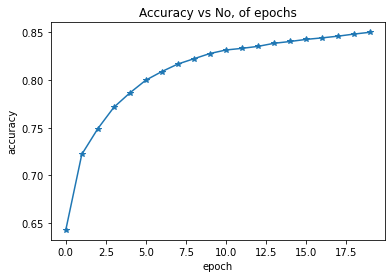

In [33]:
import matplotlib.pyplot as plt
plt.plot(accuracies, '-*') # - : line   //   * : point figure
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No, of epochs')

In [34]:
test_dataset = MNIST(root='data/', download=False, train=False, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size=256)
test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.6477, Accuracy: 0.8629


In [35]:
torch.save(model.state_dict(), 'data/mnist-logistic.pth')

## <Part 3: Call the model and apply>

In [36]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


* We should call all the necessary packages and the functions. 
* We do not have to call the training and validation dataset. In fact this is the whole point of saving the model.

In [37]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np

In [38]:
input_size=28*28; num_classes=10
loss_fn = F.cross_entropy

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,input_size)
        out = self.linear(xb)
        return out
    
# Given a single batch in the training dataset, we update the parameter once.
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None): # xb: Xmat // yb: label 
    preds = model(xb)
    loss = loss_func(preds, yb) # 1st step
    
    if opt is not None:
        loss.backward() # 2nd step
        opt.step() # 3rd step
        opt.zero_grad() # 4th step
    
    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb) # accuracy
    
    return loss.item(), len(xb), metric_result # xb : 128-1-28-28 tensor: len(xb)=128

def evaluate(model, loss_fn, valid_dl, metric=None):
    results = [loss_batch(model, loss_fn, xb, yb, metric = metric) for xb,yb in valid_dl]
    losses, nums, metrics = zip(*results)
    total = sum(nums)
    avg_loss = np.sum(np.multiply(losses, nums)) / total # average loss
    avg_metric = None
    if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total # average accuracy
    return avg_loss, total, avg_metric # We later use this for assessing the performance when applied to validation dataset.


def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) # Since softmax is monotonely increasing function, there is no need to F.softmax().
    return torch.sum(preds==labels).item() / len(preds)

In [39]:
model_call = MnistModel()
model_call.load_state_dict(torch.load('data/mnist-logistic.pth'))

<All keys matched successfully>

In [40]:
test_dataset = MNIST(root='data/', download=False, train=False, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size=256)
test_loss, total, test_acc = evaluate(model_call, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.6477, Accuracy: 0.8629
